In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import networkit as nk
import graph_tool.all as gt
import networkx as nx
import igraph as ig

import powerlaw
import matplotlib.pyplot as plt

from plots import Plots
from tools import values_frequency

In [3]:
snapReader = nk.graphio.SNAPGraphReader(False, False)
G_nk = snapReader.read("networkit-facebook.txt")

G_gt = gt.load_graph_from_csv("graph-tool-facebook.csv", csv_options={"delimiter": " "})

G_ig = ig.Graph.Read_Ncol("igraph-facebook.csv", directed=False)

Calculating best minimal value for power law fit


number of nodes: 134833
number of edges: 1380293
min degree: 1
max degree: 1469
average degree: 353.62900505902195
----------------------------------------------------------------
estimated gamma: 2.8088022073922803
the likelihood of better fit with powerlaw over exponential is 632.6932797362506 and the significance of this value is equal to 2.3877522909753755e-30.


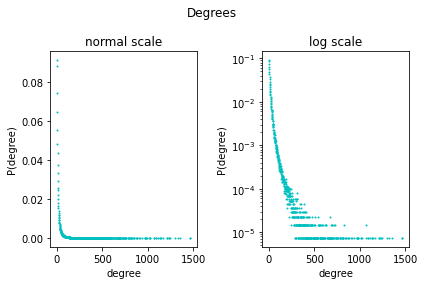

In [4]:
degrees = [G_nk.degree(v) for v in G_nk.iterNodes()]
degrees, freq = values_frequency(degrees)
Plots.degree_distribution(degrees, freq, "Degrees")

degree_distr = sorted(nk.centrality.DegreeCentrality(G_nk).run().scores(), reverse=True)
fitted_distr = powerlaw.Fit(degree_distr)
distr_compare = fitted_distr.distribution_compare('power_law','exponential')

print('number of nodes: {}'.format(G_nk.numberOfNodes()))
print('number of edges: {}'.format(G_nk.numberOfEdges()))
print('min degree: {}'.format(min(degrees)))
print('max degree: {}'.format(max(degrees)))
print('average degree: {}'.format(sum(degrees)/len(degrees)))
print('----------------------------------------------------------------')
print('estimated gamma: {}'.format(fitted_distr.alpha))
print('the likelihood of better fit with powerlaw over exponential is {} ' \
      'and the significance of this value is equal to {}.'.format(distr_compare[0], distr_compare[1]))

In [5]:
graph_density = G_nk.numberOfEdges() / ((G_nk.numberOfNodes()*(G_nk.numberOfNodes()-1))/2)
print('the graph density equals: {}'.format(graph_density))

the graph density equals: 0.00015184905972283927


In [7]:
clustering_coefficient = nk.globals.clustering(G_nk)
print('the clustering coefficient of the graph equals: {}'.format(clustering_coefficient))

the clustering coefficient of the graph equals: 0.2584904021540867


number of components is: 8
component sizes: {0: 50515, 1: 14113, 2: 7057, 3: 27917, 4: 11565, 5: 13866, 6: 5908, 7: 3892}


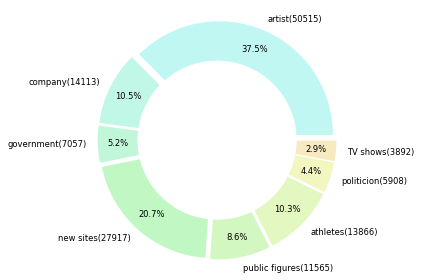

In [8]:
connected_components = nk.components.ConnectedComponents(G_nk).run()
print("number of components is: {}".format(connected_components.numberOfComponents()))
print("component sizes: {}".format(connected_components.getComponentSizes()))

labels = ['artist(50515)', 'company(14113)', 'government(7057)', 'new sites(27917)', 
          'public figures(11565)', 'athletes(13866)', 'politicion(5908)', 'TV shows(3892)']
fracs = [50515, 14113, 7057, 27917, 11565, 13866, 5908, 3892]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#c1f7f3','#c1f7e7','#c1f7d9','#c1f7c3', '#d3f7c1', '#e3f7c1', '#f2f7c1', '#f7eac1']
Plots.pie_plots(fracs, labels, colors, explode)

In [9]:
G_nx = nk.nxadapter.nk2nx(G_nk)
assortativity = nx.degree_assortativity_coefficient(G_nx)
print('assortativity coefficient is: {}'.format(assortativity))

assortativity coefficient is: 0.07386142463902601


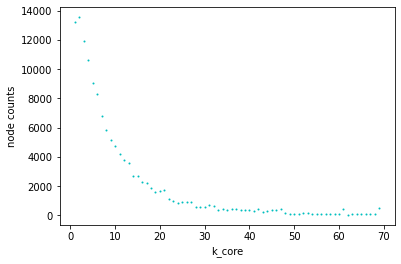

In [10]:
k_cores = gt.kcore_decomposition(G_gt)
kcore_vals, freq = values_frequency(k_cores)
Plots.plot_frequency(kcore_vals, freq, x_label='k_core', y_label='node counts')

In [8]:
with open('node_kcores.csv', 'w+') as file:
    file.write('Id,Label\n')
    for v in G_gt.iter_vertices():
        file.write('{},{}\n'.format(v, k_cores[v]))
        
with open('gt_edge_tabels.csv', 'w+') as file:
    file.write('Source,Target\n')
    for e in G_gt.iter_edges():
        file.write('{},{}\n'.format(e[0], e[1]))

In [12]:
infomap = ig.Graph.community_infomap(G_ig)

In [19]:
pal = ig.drawing.colors.ClusterColoringPalette(len(infomap))
layout = G_ig.layout("kk")
G_ig.vs['color'] = pal.get_many(infomap.membership)
ig.plot(G_ig, layout=layout).save('y.png')

MemoryError: Error at ../../../source/igraph/src/vector.pmt:132: cannot init vector, Out of memory

In [14]:
G_ig.attributes()

[]

In [17]:
!pip3 install python-igraph